In [1]:
from EXP1whiteblackground import display_all_images, clean_experiment_data, calculate_row_mlae, plot_mlae_heatmap


### Display 6 images

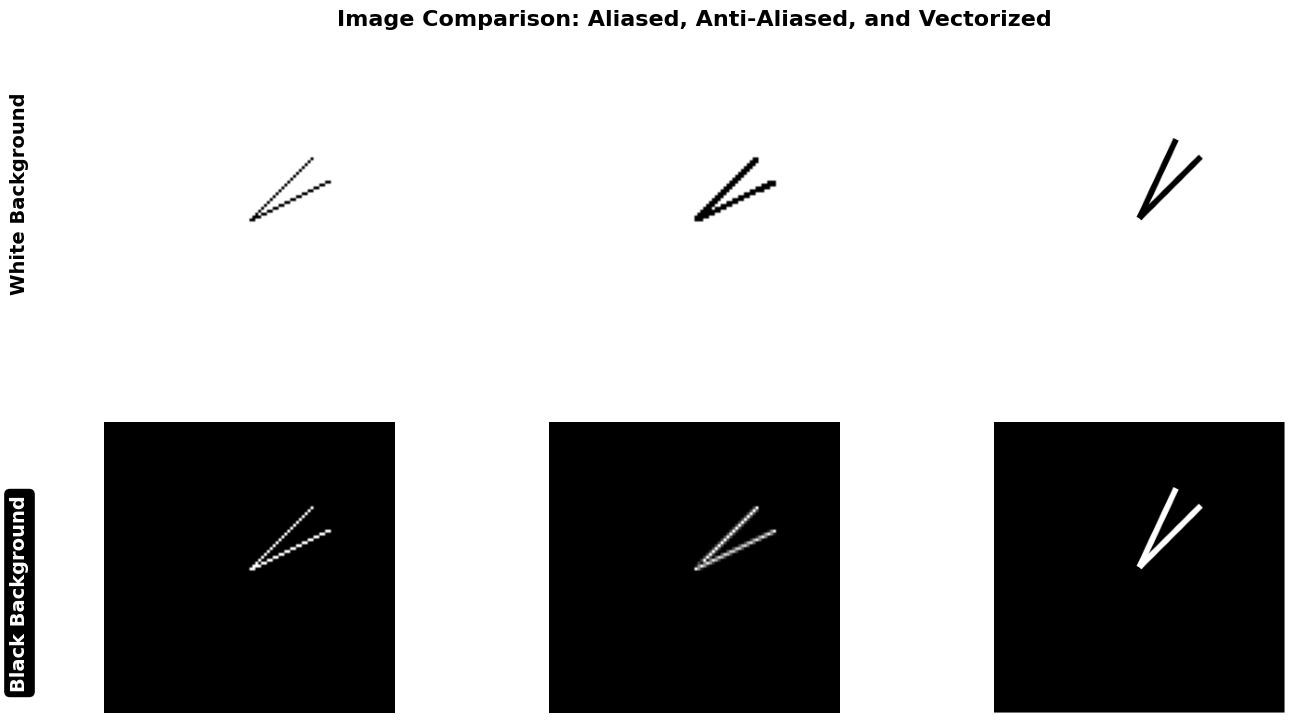

In [2]:
display_all_images("./testdifferenttypeofimages")

### Run experiments and put them into dataframe 

In [3]:
df = clean_experiment_data("experiment_results.csv")
df

,Model,Answer,Image Name
0,gpt4o,45.0,vectorized_image_white.pdf
1,gpt4o,30.0,antialiased_image_white.png
2,gpt4o,30.0,vectorized_image_black.pdf
3,gpt4o,20.0,aliased_image_black.png
4,gpt4o,45.0,aliased_image_white.png
5,GeminiProVision,25.0,antialiased_image_black.png
6,GeminiProVision,20.0,vectorized_image_white.pdf
7,GeminiProVision,45.0,antialiased_image_white.png
8,GeminiProVision,45.0,vectorized_image_black.pdf
9,GeminiProVision,45.0,aliased_image_black.png


I converted from svg to pdf as input for pretrained models as they won't take svg as an input.

### Caculate MLAE for a single row using its Answer and the ground truth


In [4]:
# Apply row-wise MLAE calculation
df['MLAE'] = df.apply(lambda row: calculate_row_mlae(row), axis=1)

# Display the updated DataFrame
print(df)

              Model  Answer                   Image Name      MLAE
0             gpt4o    45.0   vectorized_image_white.pdf  4.651052
1             gpt4o    30.0  antialiased_image_white.png  3.339850
2             gpt4o    30.0   vectorized_image_black.pdf  3.339850
3             gpt4o    20.0      aliased_image_black.png -3.000000
4             gpt4o    45.0      aliased_image_white.png  4.651052
5   GeminiProVision    25.0  antialiased_image_black.png  2.357552
6   GeminiProVision    20.0   vectorized_image_white.pdf -3.000000
7   GeminiProVision    45.0  antialiased_image_white.png  4.651052
8   GeminiProVision    45.0   vectorized_image_black.pdf  4.651052
9   GeminiProVision    45.0      aliased_image_black.png  4.651052
10  GeminiProVision    45.0      aliased_image_white.png  4.651052
11   Gemini1_5Flash    45.0  antialiased_image_black.png  4.651052
12   Gemini1_5Flash    45.0   vectorized_image_white.pdf  4.651052
13   Gemini1_5Flash    45.0  antialiased_image_white.png  4.65

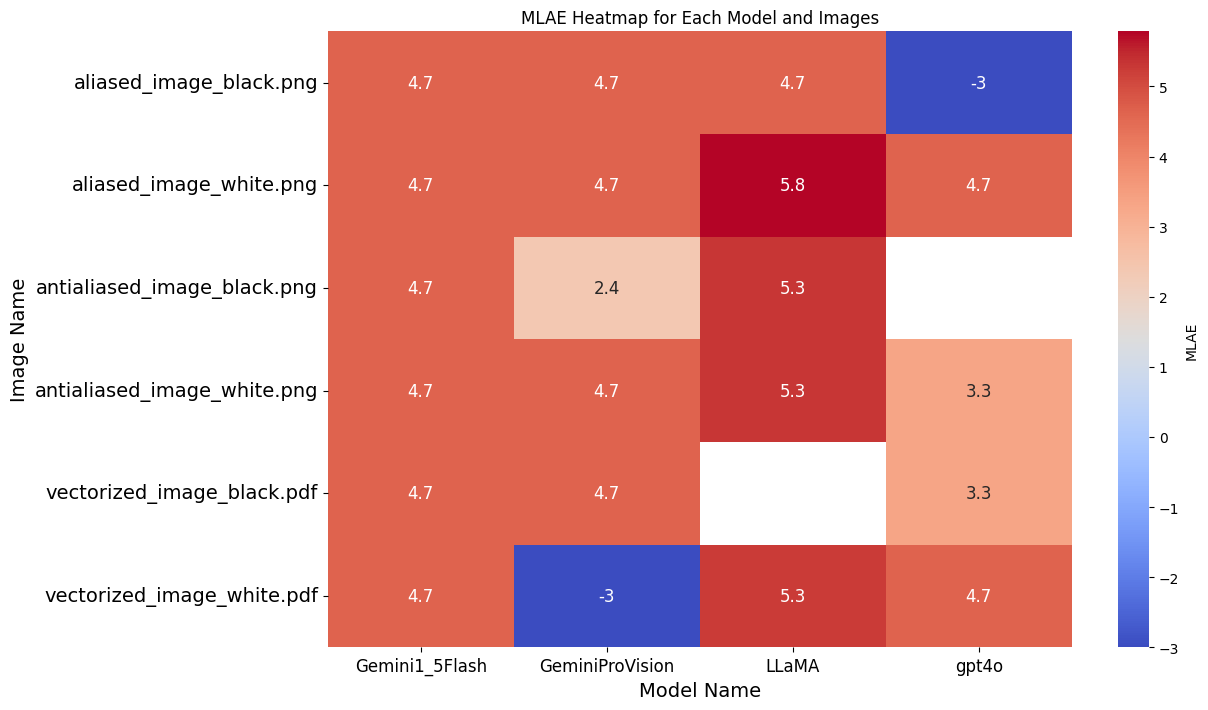

In [5]:
plot_mlae_heatmap(df)

- From what I observed from the heatmap, Gemini Pro Vision works well on vectorized image with white background.

- And GPT-4o works well with aliased images with black background.